MobileNet

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
# %matplotlib incline

In [16]:
train_path = '/content/drive/MyDrive/Melanoma_Dataset/train/'
valid_path = '/content/drive/MyDrive/Melanoma_Dataset/valid/'
test_path = '/content/drive/MyDrive/Melanoma_Dataset/test/'

In [17]:
# preprocessing_function=tf.keras.applications.mobilenet.preprocess_input   scales the image from 255 to be on a scale from -1 to 1 for RGB values
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 10413 images belonging to 2 classes.
Found 3562 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.


In [18]:
assert train_batches.n == 10413
assert valid_batches.n == 3562
assert train_batches.n == 3561
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 10

AssertionError: ignored

In [3]:
# Download MobileNet from the Internet so you need an Internet connection
mobile = tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 0s 0us/step


In [10]:
def prepare_image(file):
  img_path = "/content/drive/MyDrive/Melanoma_Dataset/test/Melanoma/"
  # Taking image size to be reconfigured to be 224 * 224 
  img = image.load_img(img_path + file, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array_expanded_dims = np.expand_dims(img_array, axis=0)
  # Get the new reconfigured image to scale all the RGB scales pixils to be from -1 to 1
  return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

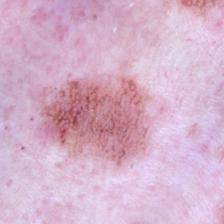

In [6]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/Melanoma_Dataset/test/Melanoma/AUG_0_11.jpeg", width=300, height=300)

In [11]:
preprocessed_image = prepare_image('AUG_0_11.jpeg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

49152/35363 [=========================================] - 0s 0us/step


[[('n03314780', 'face_powder', 0.39016253),
  ('n03485794', 'handkerchief', 0.09317512),
  ('n02219486', 'ant', 0.084848605),
  ('n03887697', 'paper_towel', 0.051789187),
  ('n07930864', 'cup', 0.029257)]]

In [15]:
assert results[0][0][1] == 'skin_cancer'

AssertionError: ignored